# Introduction
This Project is on a data set contains about 113937 loans with 81 variables on each loan.

The main purpose of this project is to summarize the characteristics btw the Loan Rate , Employee status , Loan Quater ,CreditScore among multiple variable using summary statics and data visualizations.

In [2]:
#import all required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [3]:
# Defining the colour palette list

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

In [4]:
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [5]:
# load the raw dataset
df_loan = pd.read_csv('ProsperLoanData.csv')
df_loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
53406,6F7D3403239289769657C12,215175,2007-10-12 17:50:20.523000000,C,36,Completed,2009-06-19 00:00:00,0.12700,0.1200,0.1100,NaN,NaN,NaN,NaN,NaN,NaN,0,NY,Professional,Full-time,85.0,False,True,NaN,2007-10-12 17:47:22.820000000,660.0,679.0,1992-09-28 00:00:00,8.0,6.0,21.0,3,15.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0,496.0,0.76,154.0,12.0,0.58,0.0,0.15,"$50,000-74,999",True,5825.166667,83F43403114913407F33893,1.0,4.0,4.0,0.0,0.0,2105.0,0.0,0.0,0,NaN,77,21083,3000,2007-10-24 00:00:00,Q4 2007,77543369916293713DF82ED,99.64,3337.6500,3000.00,337.6500,-28.14,0.0,0.00,0.00,0.0,1.0,1,0,0.0,104
96818,A74D3590237344621680924,926899,2013-09-28 10:45:54.157000000,NaN,60,Current,NaN,0.22908,0.2045,0.1945,0.17970,0.0899,0.08980,4.0,C,6.0,1,OK,Social Worker,Employed,42.0,False,False,NaN,2013-09-28 10:45:57,640.0,659.0,1995-12-06 00:00:00,6.0,6.0,44.0,6,195.0,0.0,0.0,4.0,0.0,50.0,1.0,0.0,4133.0,0.86,498.0,33.0,0.59,0.0,0.22,"$25,000-49,999",True,3166.666667,899A3695415922890061A20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,104716,10000,2013-10-03 00:00:00,Q4 2013,7B533694404209000246360,267.45,1331.6473,507.39,824.2573,-40.58,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
50089,38F33594721394762749394,992812,2013-11-13 13:31:11.483000000,NaN,60,Current,NaN,0.23318,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,1,MA,NaN,Other,24.0,True,False,NaN,2013-11-13 13:31:13,660.0,679.0,1995-08-28 00:00:00,8.0,8.0,26.0,7,407.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,16733.0,0.69,7267.0,20.0,0.90,0.0,0.23,"$50,000-74,999",True,5000.000000,5A7D36982429920492AAA24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,111068,15000,2013-11-18 00:00:00,Q4 2013,899B36980647842843BF817,404.54,1213.6200,433.05,780.5700,-37.43,0.0,0.00,0.00,0.0,1.0,0,0,0.0,155
98231,955C3579152264276C9027E,791983,2013-05-29 15:57:27.660000000,NaN,36,Completed,2013-11-13 00:00:00,0.35356,0.3134,0.3034,0.27600,0.1575,0.11850,1.0,HR,2.0,13,TX,Other,Not employed,0.0,True,False,NaN,2013-05-29 15:57:21,780.0,799.0,1998-02-05 00:00:00,13.0,8.0,21.0,4,114.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1191.0,0.18,4325.0,19.0,0.78,1.0,NaN,Not employed,False,0.000000,496B3684551239849B5F045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,9,91946,4000,2013-06-03 00:00:00,Q2 2013,495D35801039444179A99D4,172.76,4534.9155,4000.00,534.9155,-17.19,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
76332,520635438539754334AF0D1,574939,2012-04-03 08:37:36.610000000,NaN,12,Chargedoff,2013-04-10 00:00:00,0.17260,0.0958,0.0858

In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df_loan.describe() 

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [8]:
df_loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
df_loan.duplicated().sum()

0

In [10]:
df_loan_2 = df_loan[df_loan['ProsperScore'].isnull()==False]

In [11]:
# remove columns and columns with empty values that are not useful in the Dateset
df_loan_2.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

C:\Users\Amit Singh\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_loan_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Term                                84853 non-null  int64  
 1   LoanStatus                          84853 non-null  object 
 2   BorrowerAPR                         84853 non-null  float64
 3   BorrowerRate                        84853 non-null  float64
 4   LenderYield                         84853 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null  float64
 6   EstimatedLoss                       84853 non-null  float64
 7   EstimatedReturn                     84853 non-null  float64
 8   ProsperRating (numeric)             84853 non-null  float64
 9   ProsperRating (Alpha)               84853 non-null  object 
 10  ProsperScore                        84853 non-null  float64
 11  ListingCategory (numeric)           8485

In [13]:
df_loan_2.isnull().sum()

Term                                     0
LoanStatus                               0
BorrowerAPR                              0
BorrowerRate                             0
LenderYield                              0
EstimatedEffectiveYield                  0
EstimatedLoss                            0
EstimatedReturn                          0
ProsperRating (numeric)                  0
ProsperRating (Alpha)                    0
ProsperScore                             0
ListingCategory (numeric)                0
BorrowerState                            0
Occupation                            1333
EmploymentStatus                         0
EmploymentStatusDuration                19
IsBorrowerHomeowner                      0
CreditScoreRangeLower                    0
CreditScoreRangeUpper                    0
CurrentCreditLines                       0
OpenCreditLines                          0
TotalCreditLinespast7years               0
OpenRevolvingAccounts                    0
OpenRevolvi

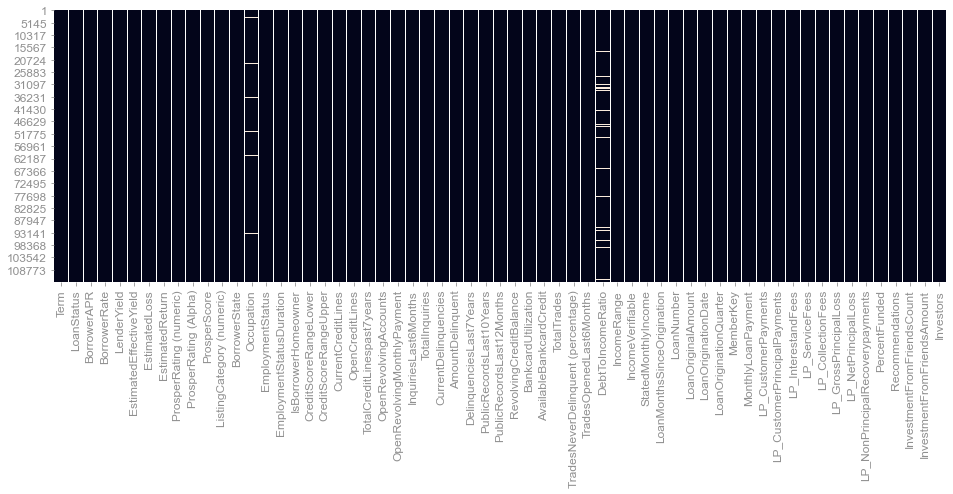

In [14]:
#Checking of all null value using heatmap

plt.figure(figsize = (16,5))
ax=sb.heatmap(df_loan_2.isnull(), cbar=False)

In [142]:
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan_2['ProsperRating (Alpha)'] = df_loan_2['ProsperRating (Alpha)'].astype(ordered_var)

C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Univariate Exploration

## Occupations of borrowers

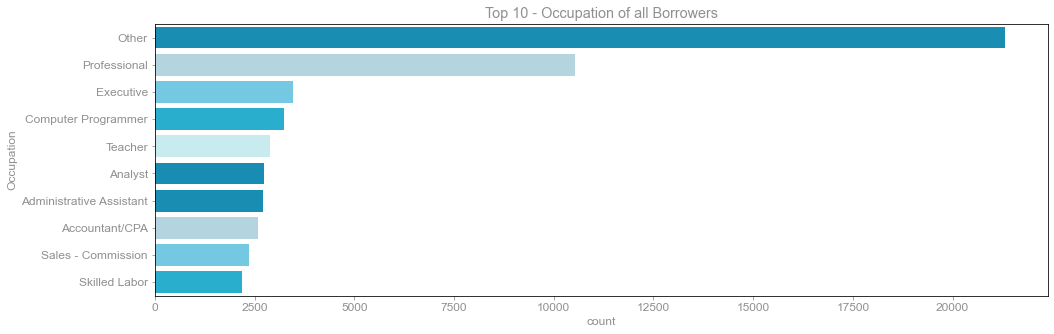

In [145]:
# see the top 10 occupations of borrowers
plt.figure(figsize = [16, 5]) 

sb.countplot(data = df_loan_2, y = 'Occupation', palette = color_palette_list,
             order = df_loan_2['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");
plt.savefig('Top 10 - Occupation of all Borrowers', bbox_inches='tight')

**Insights:**

As we can see that the number of borrowers from other field is around 21317 where as the professional are having 10542 



In [146]:
df_loan_2['Occupation'].value_counts().head(10)

Other                       21317
Professional                10542
Executive                    3468
Computer Programmer          3236
Teacher                      2888
Analyst                      2735
Administrative Assistant     2708
Accountant/CPA               2574
Sales - Commission           2350
Skilled Labor                2180
Name: Occupation, dtype: int64

## Current Loan Status

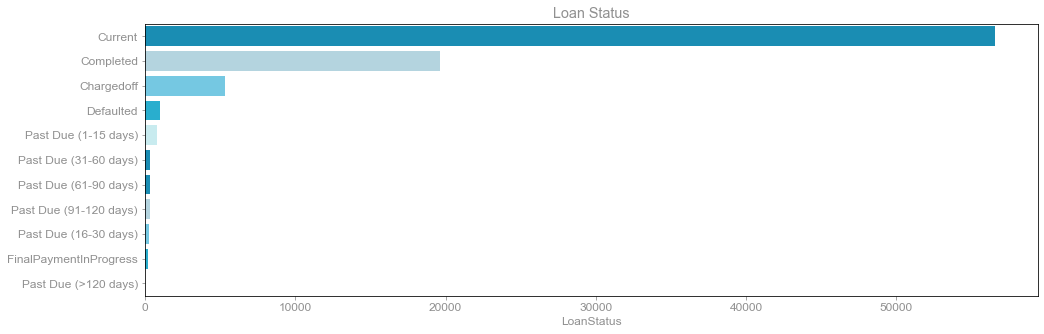

In [147]:
# What is the loan Status?
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(y=df_loan_2['LoanStatus'].value_counts().index, x=df_loan_2['LoanStatus'].value_counts(),palette = color_palette_list )
plt.title("Loan Status");
plt.savefig('Loan Status', bbox_inches='tight')

**Insights:**

- From the above graph we can say their are many  loan status are in current status and few of them are completed.
- 56576 loans status are current and 19664 loan status are completed .

## Employment Status

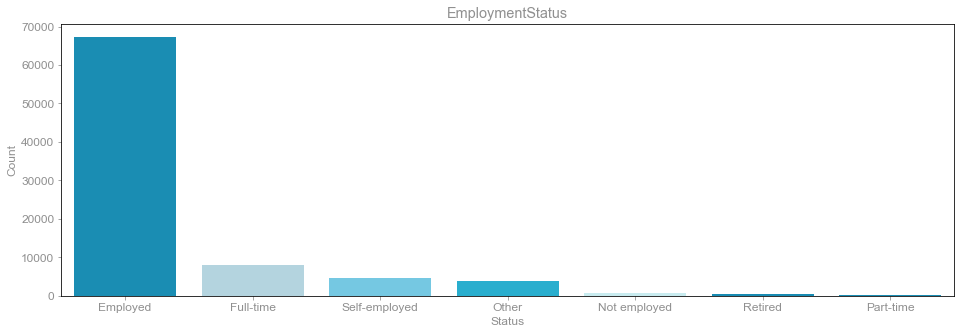

In [148]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['EmploymentStatus'].value_counts().index, y=df_loan_2['EmploymentStatus'].value_counts(),palette = color_palette_list)
ax.set_title("EmploymentStatus")
ax.set_ylabel("Count")
ax.set_xlabel("Status")
plt.savefig('Employment Status', bbox_inches='tight')

## Credit Score Range

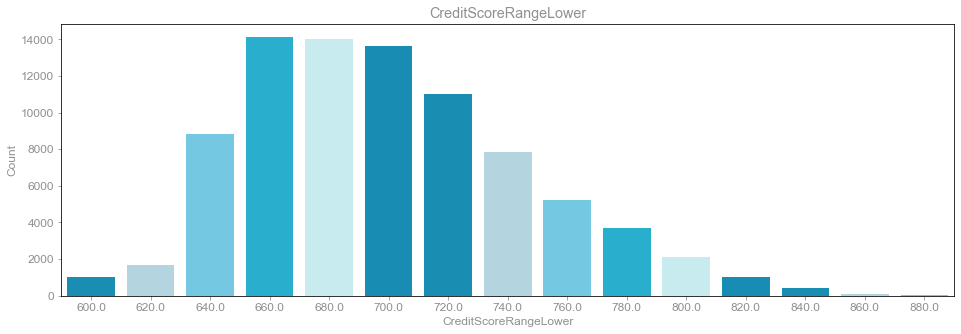

In [149]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['CreditScoreRangeLower'].value_counts().index, y=df_loan_2['CreditScoreRangeLower'].value_counts(),palette = color_palette_list)
ax.set_title("CreditScoreRangeLower")
ax.set_ylabel("Count")
ax.set_xlabel("CreditScoreRangeLower")
plt.savefig('CreditScoreRangeLowe', bbox_inches='tight')

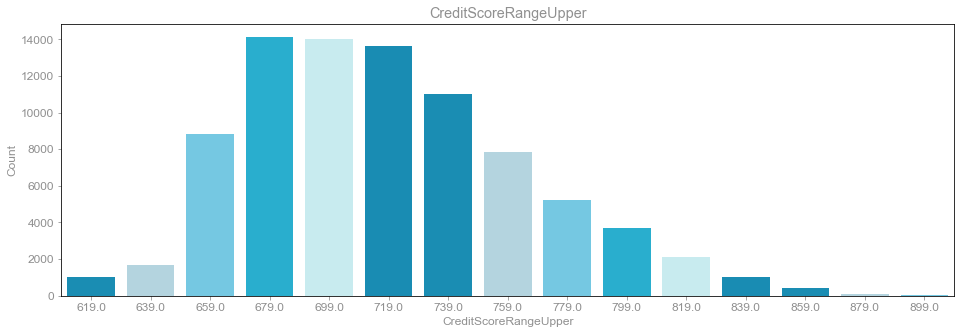

In [150]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['CreditScoreRangeUpper'].value_counts().index, y=df_loan_2['CreditScoreRangeUpper'].value_counts(),palette = color_palette_list)
ax.set_title("CreditScoreRangeUpper")
ax.set_ylabel("Count")
ax.set_xlabel("CreditScoreRangeUpper")
plt.savefig('CreditScoreRangeUpper', bbox_inches='tight')

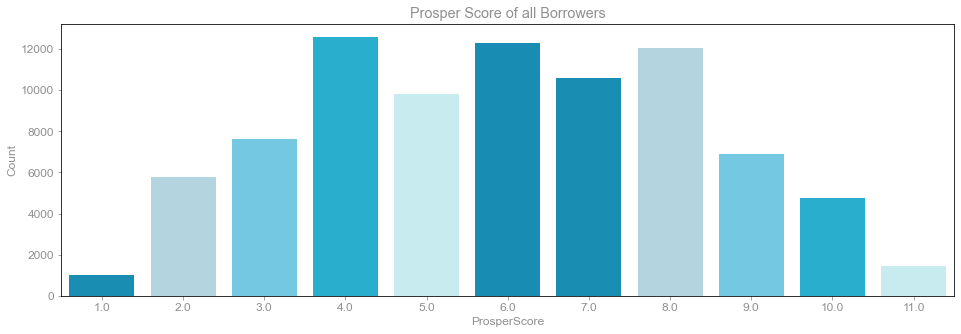

In [151]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['ProsperScore'].value_counts().index, y=df_loan_2['ProsperScore'].value_counts(),palette = color_palette_list)
ax.set_title("Prosper Score of all Borrowers")
ax.set_ylabel("Count")
ax.set_xlabel("ProsperScore")
plt.savefig('ProsperScore', bbox_inches='tight')

## Income Rate distribution

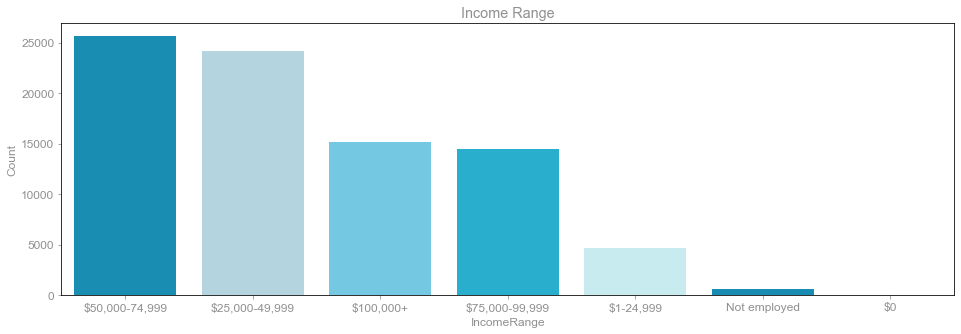

In [152]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['IncomeRange'].value_counts().index, y=df_loan_2['IncomeRange'].value_counts(),palette = color_palette_list)
ax.set_title("Income Range")
ax.set_ylabel("Count")
ax.set_xlabel("IncomeRange")
plt.savefig('IncomeRange', bbox_inches='tight')

In [153]:
df_loan_2['open_year'] = df_loan.ListingCreationDate.str.split('-').str[0]
df_loan_2['close_year'] = df_loan['ClosedDate'].str.slice(start=0, stop=-6)
df_loan_2['close_year'] = pd.to_datetime(df_loan_2['close_year'],format ="%Y-%m-%d %H:%M:%S")
df_loan_2['close_year'] = pd.DatetimeIndex(df_loan_2['close_year']).year
df_loan_2['close_year'].dropna(inplace=True)

C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

## Borrower Rate at the time of  opening and closing loan year

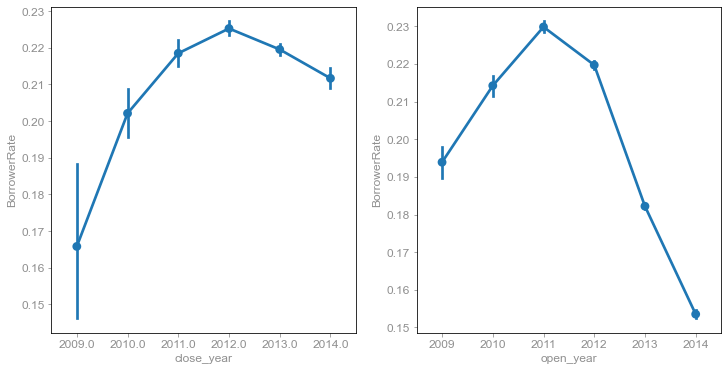

In [154]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data=df_loan_2, x='close_year', y='BorrowerRate',ax=ax[0]);

#plt.savefig('borrowerrate-year', bbox_inches='tight')

sb.pointplot(data=df_loan_2, x='open_year', y='BorrowerRate',ax=ax[1]);

#plt.savefig('borrowerrate-year', bbox_inches='tight')

**Insights**

- In 2014 at the time of closing the borrower rate was 0.21 and opening was around 0.16
- As in 2011 their was high borrower rate for the new loans around 0.23

In [155]:
df_loan_2['quateryear'] = df_loan.LoanOriginationQuarter.str.split(' ').str[0]

C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Quater in which the loan was originated

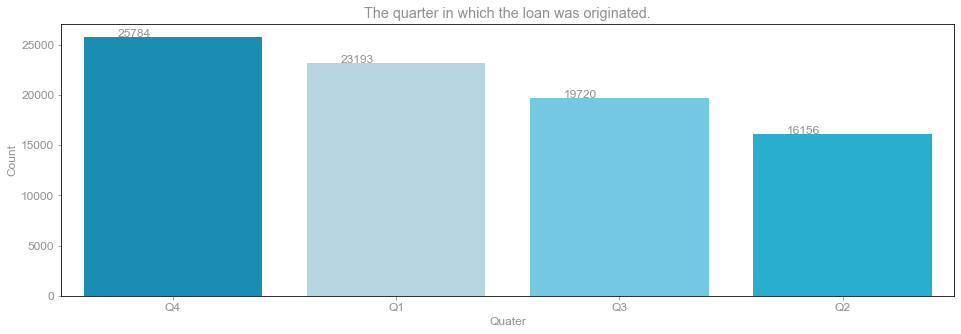

In [156]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['quateryear'].value_counts().index, y=df_loan_2['quateryear'].value_counts(),palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))
ax.set_title("The quarter in which the loan was originated.")
ax.set_ylabel("Count")
ax.set_xlabel("Quater")
plt.savefig('quater', bbox_inches='tight')


**Insights**

- In Q4 their was max loan applicant.
- Their was a sudden drop fall after Q1 but then it started increasing .

## Loan Term

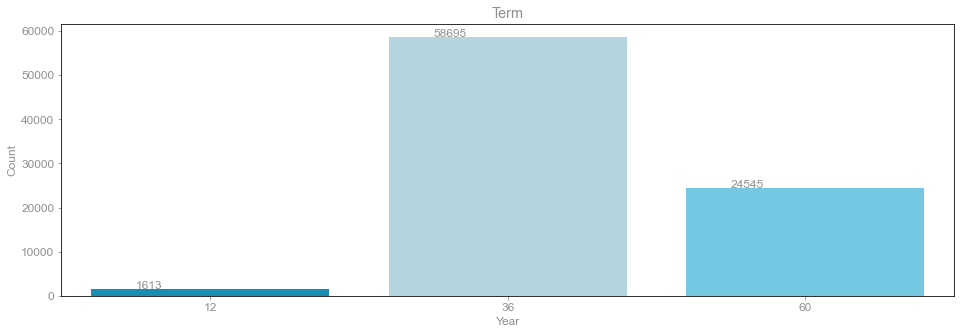

In [157]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.barplot(x=df_loan_2['Term'].value_counts().index, y=df_loan_2['Term'].value_counts(),palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))
ax.set_title("Term")
ax.set_ylabel("Count")
ax.set_xlabel("Year")
plt.savefig('term-year', bbox_inches='tight')

## Employment Status over Term

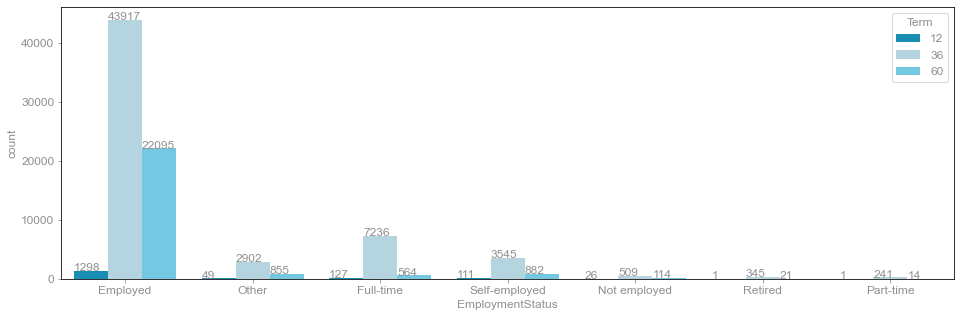

In [158]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, x = 'EmploymentStatus', hue = 'Term', palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+2))
plt.savefig('termEmploymentstatus', bbox_inches='tight')

## Employment Status over Income Rate

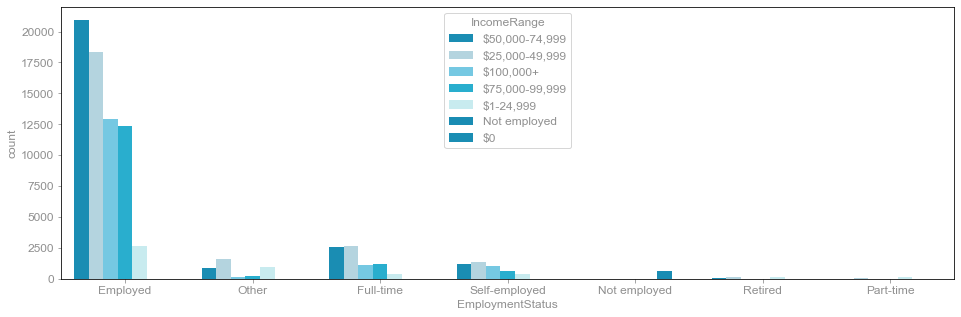

In [159]:
fig, ax = plt.subplots(figsize = (16,5))
sb.countplot(data = df_loan_2, x = 'EmploymentStatus', hue = 'IncomeRange', palette = color_palette_list)

**Insights from the Univariate exploration data**




## Bivariate Exploration

## Analyze of No of home owner having employment status

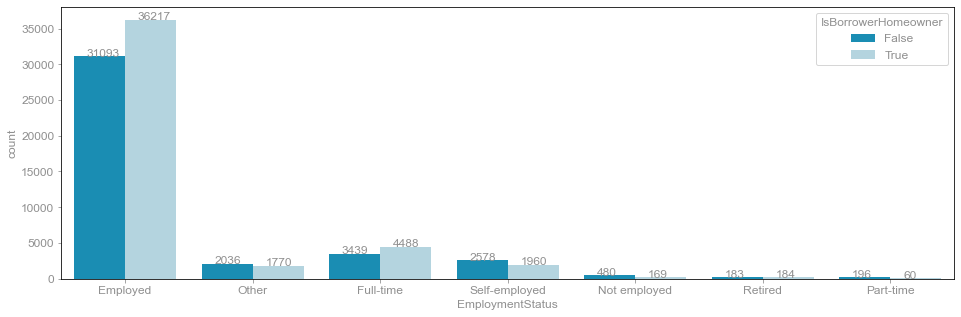

In [160]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.savefig('mEmploymentstatus-homeowner', bbox_inches='tight')

## Loan Term having on Home owner

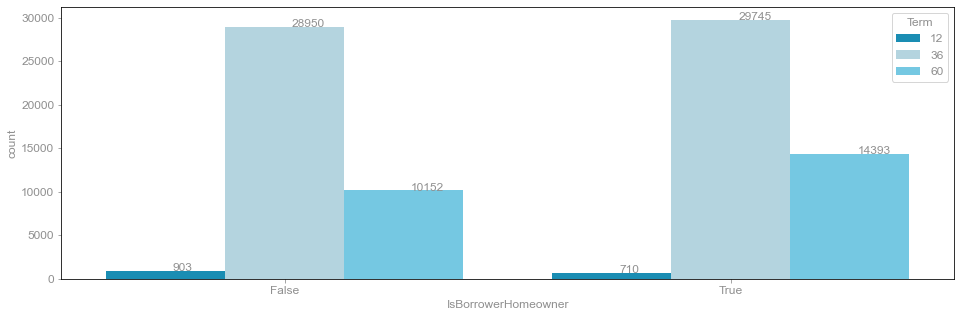

In [161]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, x = 'IsBorrowerHomeowner', hue = 'Term', palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))
plt.savefig('Employmentstatus-Term', bbox_inches='tight')

## Which year home owner take loan ?

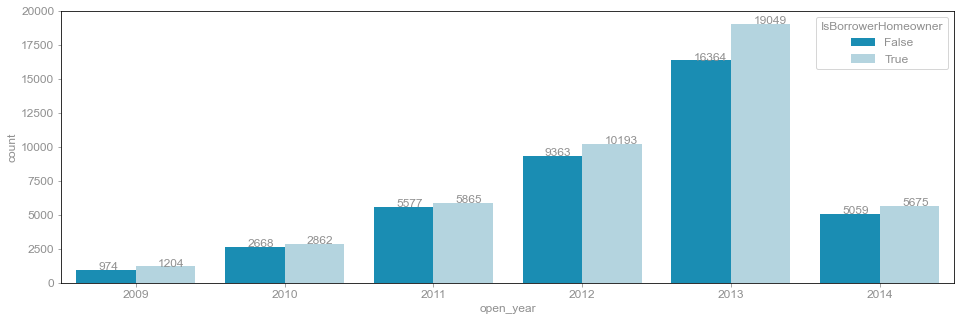

In [162]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, x = 'open_year', hue = 'IsBorrowerHomeowner', palette = color_palette_list)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))

plt.savefig('year-house', bbox_inches='tight')

##  Income Range  vs Prosper rating

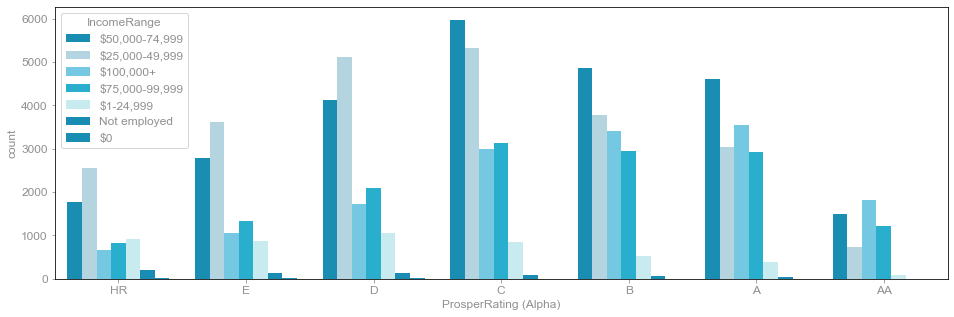

In [163]:
fig, ax = plt.subplots(figsize = (16,5))

sb.countplot(data = df_loan_2, x = 'ProsperRating (Alpha)', hue = 'IncomeRange', palette = color_palette_list)


## Employment status vs ProsperRating


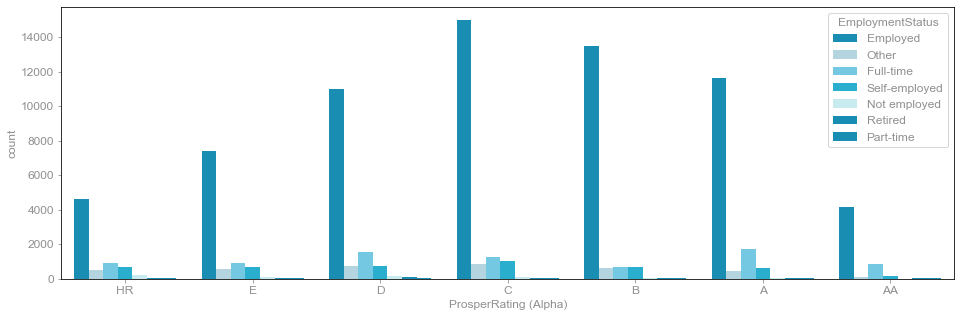

In [164]:
fig, ax = plt.subplots(figsize = (16,5))

sb.countplot(data = df_loan_2, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = color_palette_list)


##  Home owner having loan status

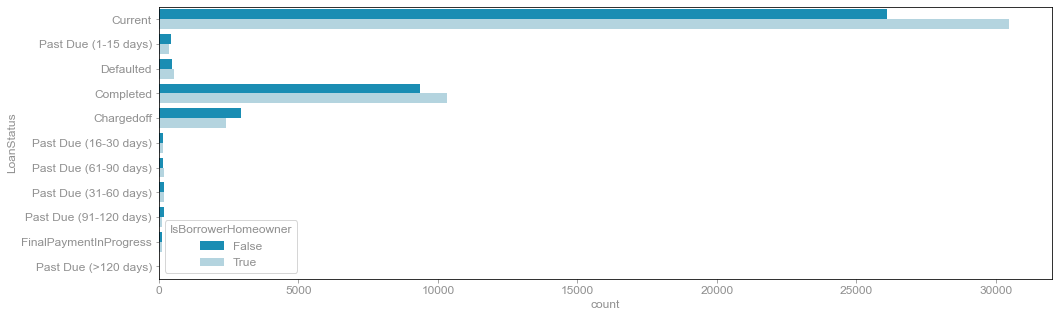

In [165]:
fig, ax = plt.subplots(figsize = (16,5))
ax=sb.countplot(data = df_loan_2, y = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = color_palette_list)

Text(0.5, 1.0, 'Income Range vs Loan Amount')

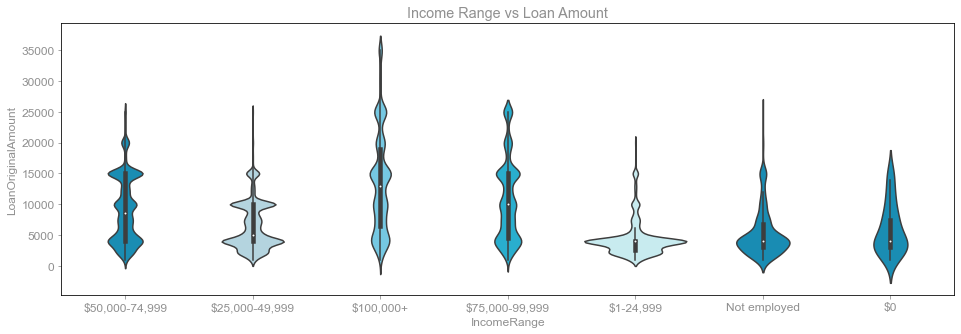

In [166]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sb.violinplot(data = df_loan_2, x = 'IncomeRange', y = 'LoanOriginalAmount', palette = color_palette_list)
plt.title('Income Range vs Loan Amount')

**Insights from the Bivariate exploration data**

- Loan status having current status have their own hown.
- Applicants having C prosper rate have highest employment status .
- Most of the applicant prefer to take 36 months term .
- The range of the salaries stated is higher for employed borrowers.
- Majority of the borrowers are taken by Employed .
- Most of the Non-Houseowner having employed status have highest major part in borrowers.


## Multivariate Exploration

## Analyse which Proper Rating take loan on which term with which borrower rate.

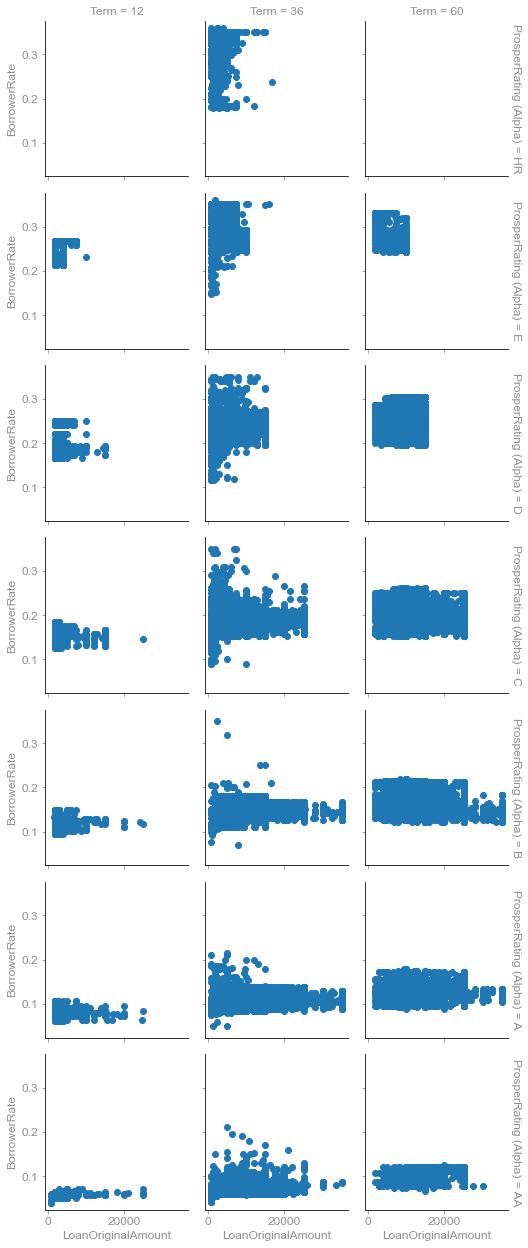

In [167]:
g = sb.FacetGrid(data = df_loan_2, col = 'Term', row = 'ProsperRating (Alpha)', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')

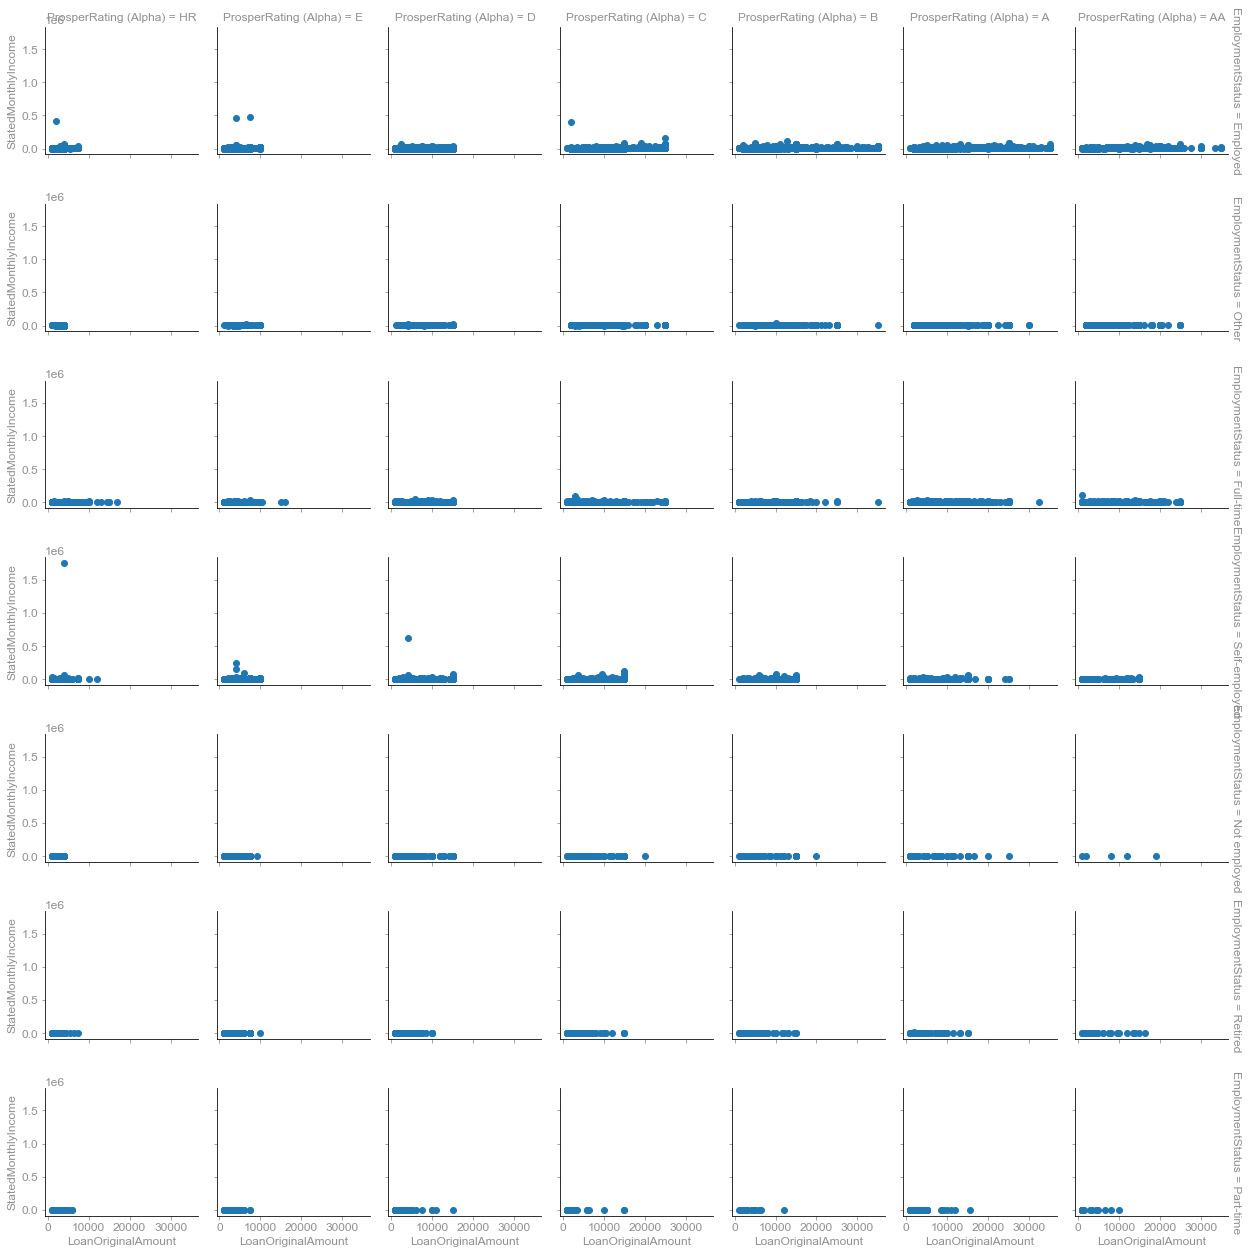

In [172]:
g = sb.FacetGrid(data = df_loan_2, col = 'ProsperRating (Alpha)', row = 'EmploymentStatus', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

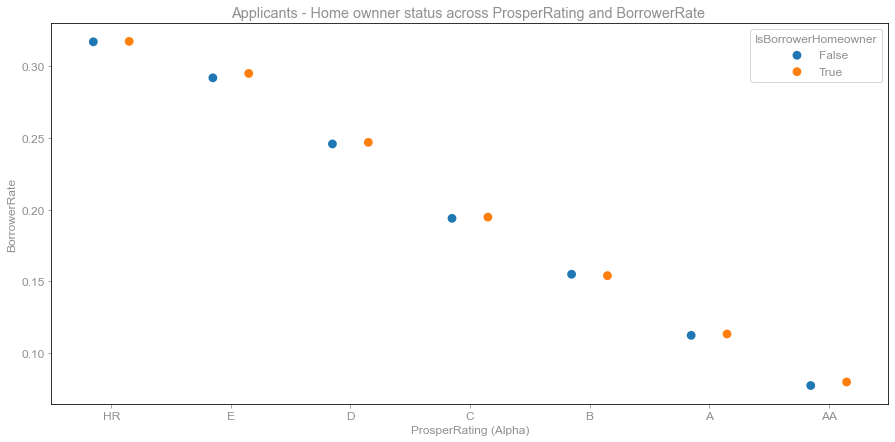

In [168]:
 plt.figure(figsize = [15, 7])

ax = sb.pointplot(data = df_loan_2, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

In [188]:
df_loan_3 = df_loan_2.copy()
df_loan_3['LoanStatus'] = df_loan_3['LoanStatus'].astype('category')
ct_counts = df_loan_3.groupby(['LoanStatus', 'ProsperScore']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')
ct_counts

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
ProsperScore,,,,,,,,,,,
1.0,235,341,337,37,2,13,8,5,4,10,0
2.0,377,848,4196,70,23,90,35,47,41,37,2
3.0,414,1077,5804,75,20,105,26,43,45,29,4
4.0,784,1828,9476,119,28,151,56,55,52,44,2
5.0,907,2212,6222,165,25,117,29,51,42,40,3
6.0,925,2847,7981,173,25,124,38,65,43,56,1
7.0,662,2357,7210,135,16,80,32,41,37,26,1
8.0,666,3711,7265,139,39,86,31,38,35,40,3
9.0,309,2836,3612,71,13,26,8,9,10,17,0


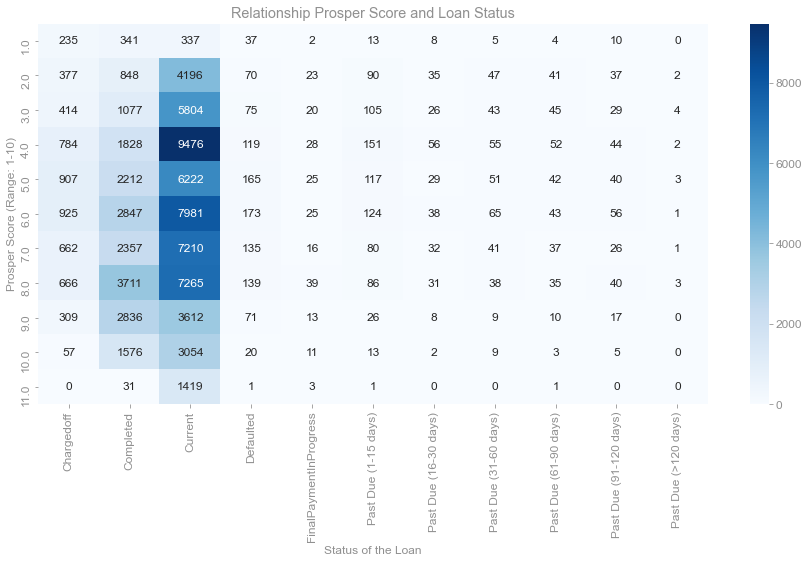

In [190]:
plt.figure(figsize = [15,7])
mask = ct_counts.isnull()
sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'Blues',mask = mask)
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score (Range: 1-10)')
plt.title('Relationship Prosper Score and Loan Status');

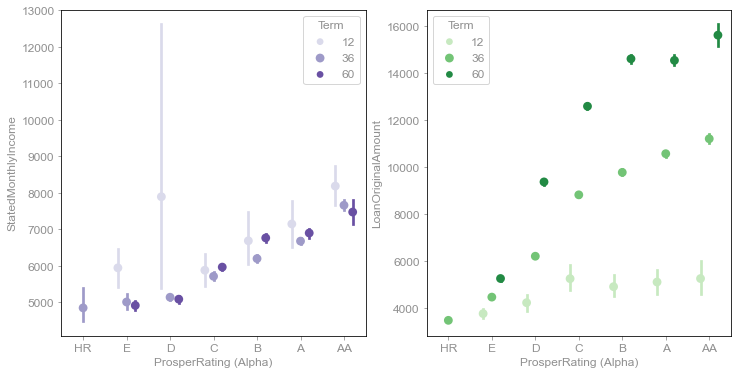

In [169]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan_2, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_loan_2, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

**Insights from the multivariate exploration data**

- As the applicant prosper ratings from AA to HR have the highest loan amount.
- AA prsoper Rating have the highest loan amount with highest term also.
- As we can see when the ProsperRating is increasing the BorrowerRate is also increasing .
- As their is no role of houseowner or not both are similarly equal.